**Building a Customer Segmentation Model**

One of the main application of unsupervised learning is market segmentation. This is when
we don't have labeled data available all the time, but it's important to segment the market
so that people can target individual groups. This is very useful in advertising, inventory
management, implementing strategies for distribution, mass media, and so on. Let's go
ahead and apply unsupervised learning to one such case to see how it can be useful.

We will be dealing with a wholesale vendor and his customers. We will be using tht data
available at *https://archive.ics.uci.edu/ml/datasets/Wholesale+customers*.  The spreadsheet
contains data regarding the consumption of different types of items by their customers
and our goal is to find clusters so that they can optimize their sales and distribution
strategy.

In [1]:
# Import the necessary packages
import csv

import numpy as np
from sklearn import cluster, covariance, manifold
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

In [2]:
# Load data from input file
input_file = 'wholesale.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[2:]
        continue

    X.append([float(x) for x in row[2:]])

# Input data as numpy array
X = np.array(X)

In [3]:
# Build a Mean Shift model with this data
# Estimating the bandwidth 
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

# Compute clustering with MeanShift
meanshift_estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_estimator.fit(X)
labels = meanshift_estimator.labels_
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))

print ("Number of clusters in input data =", num_clusters)
   

Number of clusters in input data = 8


In [4]:
# Show the centroids of these clusters
print ("Centroids of clusters:")
print ('\t'.join([name[:3] for name in names]))
for centroid in centroids:
    print ('\t'.join([str(int(x)) for x in centroid]))

Centroids of clusters:
Fre	Mil	Gro	Fro	Det	Del
9632	4671	6593	2570	2296	1248
40204	46314	57584	5518	25436	4241
112151	29627	18148	16745	4948	8550
36847	43950	20170	36534	239	47943
32717	16784	13626	60869	1272	5609
22925	73498	32114	987	20070	903
16117	46197	92780	1026	40827	2944
8565	4980	67298	131	38102	1215


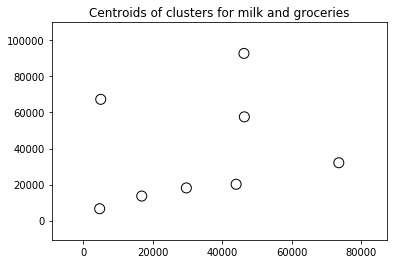

In [5]:
################
# Visualizing data

centroids_milk_groceries = centroids[:, 1:3]

# Plot the nodes using the coordinates of our centroids_milk_groceries
plt.figure()
plt.scatter(centroids_milk_groceries[:,0], centroids_milk_groceries[:,1], 
        s=100, edgecolors='k', facecolors='none')

offset = 0.2
plt.xlim(centroids_milk_groceries[:,0].min() - offset * centroids_milk_groceries[:,0].ptp(),
        centroids_milk_groceries[:,0].max() + offset * centroids_milk_groceries[:,0].ptp(),)
plt.ylim(centroids_milk_groceries[:,1].min() - offset * centroids_milk_groceries[:,1].ptp(),
        centroids_milk_groceries[:,1].max() + offset * centroids_milk_groceries[:,1].ptp())

plt.title('Centroids of clusters for milk and groceries')
plt.show()